In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from prophet import Prophet
import matplotlib.pyplot as plt
from itertools import product

In [18]:
# Load the dataset (replace 'your_data.csv' with the actual file path)
data = pd.read_csv('MARUTI.csv')

# Preprocess the data
data['Date'] = pd.to_datetime(data['Date']).dt.date
data = data.rename(columns={'Date': 'ds', 'Close': 'y'})

In [19]:
data.head()

,ds,Open,High,Low,y,Volume
0,2015-01-01,3320.25,3360.00,3320.25,3340.75,299232
1,2015-01-02,3360.00,3383.00,3350.50,3359.60,233924
2,2015-01-05,3382.00,3469.35,3376.05,3447.80,536747
3,2015-01-06,3439.00,3439.00,3382.50,3395.25,422743
4,2015-01-07,3400.00,3458.95,3382.05,3437.75,369241


In [26]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.85)
train_data = data[:train_size]
test_data = data[train_size:]

In [27]:
# Initialize and fit the Prophet model
model = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.1,interval_width=0.95)
model.fit(train_data)

# Make predictions on the test data
future = model.make_future_dataframe(periods=len(test_data))
forecast = model.predict(future)

21:51:44 - cmdstanpy - INFO - Chain [1] start processing
21:51:44 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
# Extract the predicted values for the test set
predicted_test = forecast[-len(test_data):]['yhat'].values
actual_test = test_data['y'].values

# Calculate RMSE for the test data
rmse = np.sqrt(mean_squared_error(actual_test, predicted_test))
print(f"RMSE on Test Data: {rmse}")

RMSE on Test Data: 1643.1686163380036


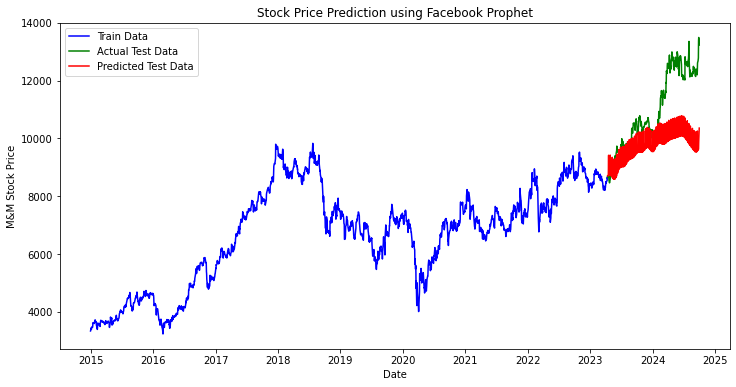

In [29]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data['ds'], train_data['y'], label='Train Data', color='blue')
plt.plot(test_data['ds'], actual_test, label='Actual Test Data', color='green')
plt.plot(test_data['ds'], predicted_test, label='Predicted Test Data', color='red')
plt.xlabel('Date')
plt.ylabel('M&M Stock Price')
plt.title('Stock Price Prediction using Facebook Prophet')
plt.legend()
plt.show()

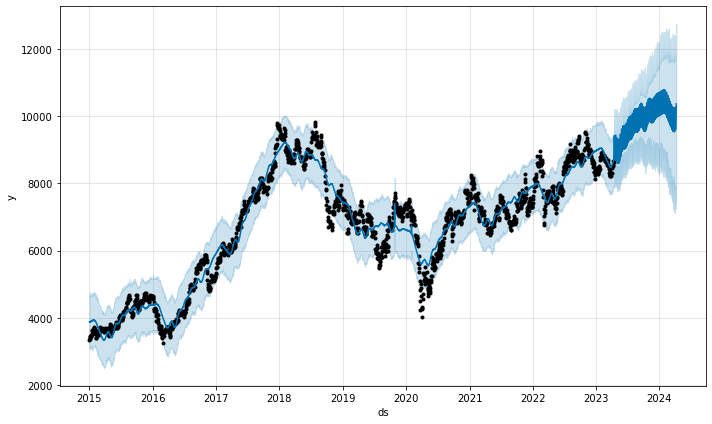

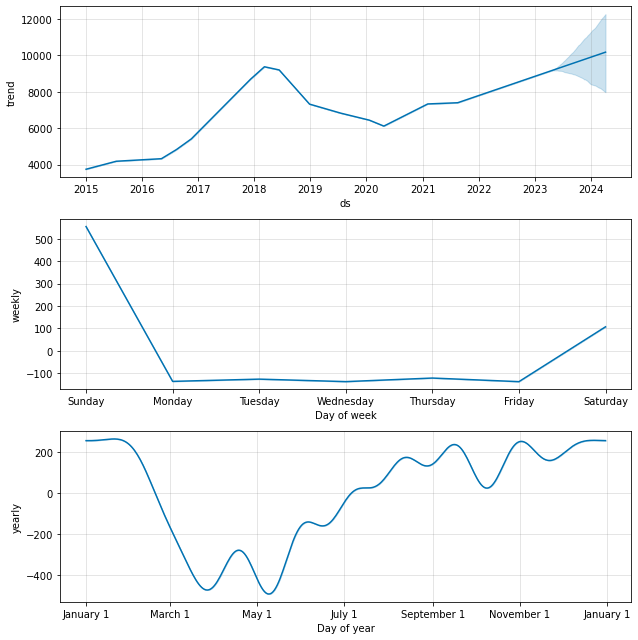

In [30]:
# Prophet's internal plot for visualization
model.plot(forecast)
plt.show()

model.plot_components(forecast)
plt.show()

In [31]:
# Define a function for hyperparameter optimization
def optimize_prophet(train_data, param_grid):
    best_params = None
    best_rmse = float('inf')

    for params in product(*param_grid.values()):
        param_dict = dict(zip(param_grid.keys(), params))
        model = Prophet(**param_dict)
        model.fit(train_data)

        future = model.make_future_dataframe(periods=len(test_data))
        forecast = model.predict(future)

        predicted_test = forecast[-len(test_data):]['yhat'].values
        actual_test = test_data['y'].values

        rmse = np.sqrt(mean_squared_error(actual_test, predicted_test))

        if rmse < best_rmse:
            best_rmse = rmse
            best_params = param_dict

    return best_params, best_rmse

# Define the parameter grid for optimization
param_grid = {
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_prior_scale': [0.01, 0.1, 0.5, 1.0],
    'seasonality_prior_scale': [0.1, 1.0, 10.0]
}

# Optimize the hyperparameters
best_params, best_rmse = optimize_prophet(train_data, param_grid)
print(f"Best Parameters: {best_params}")
print(f"Best RMSE on Validation Data: {best_rmse}")

# Train the model with the best parameters
model = Prophet(**best_params)
model.fit(train_data)

# Make predictions on the test data
future = model.make_future_dataframe(periods=len(test_data))
forecast = model.predict(future)

# Extract the predicted values for the test set
predicted_test = forecast[-len(test_data):]['yhat'].values
actual_test = test_data['y'].values

# Calculate RMSE for the test data
rmse = np.sqrt(mean_squared_error(actual_test, predicted_test))
print(f"Final RMSE on Test Data: {rmse}")

21:51:48 - cmdstanpy - INFO - Chain [1] start processing
21:51:49 - cmdstanpy - INFO - Chain [1] done processing
21:51:50 - cmdstanpy - INFO - Chain [1] start processing
21:51:51 - cmdstanpy - INFO - Chain [1] done processing
21:51:52 - cmdstanpy - INFO - Chain [1] start processing
21:51:53 - cmdstanpy - INFO - Chain [1] done processing
21:51:54 - cmdstanpy - INFO - Chain [1] start processing
21:51:55 - cmdstanpy - INFO - Chain [1] done processing
21:51:57 - cmdstanpy - INFO - Chain [1] start processing
21:51:58 - cmdstanpy - INFO - Chain [1] done processing
21:51:59 - cmdstanpy - INFO - Chain [1] start processing
21:52:01 - cmdstanpy - INFO - Chain [1] done processing
21:52:02 - cmdstanpy - INFO - Chain [1] start processing
21:52:04 - cmdstanpy - INFO - Chain [1] done processing
21:52:05 - cmdstanpy - INFO - Chain [1] start processing
21:52:07 - cmdstanpy - INFO - Chain [1] done processing
21:52:08 - cmdstanpy - INFO - Chain [1] start processing
21:52:10 - cmdstanpy - INFO - Chain [1]

Best Parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0}
Best RMSE on Validation Data: 1579.9313825275094


21:52:51 - cmdstanpy - INFO - Chain [1] start processing
21:52:53 - cmdstanpy - INFO - Chain [1] done processing


Final RMSE on Test Data: 1579.9313825275094
